In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

import torch as T
import torch.nn as nn
import torch.optim as O
from torch.utils.data import DataLoader , TensorDataset

import os
import tqdm

In [215]:
df = pd.read_csv("../../csvs/Space/Space Travel/Titanic spaceship/train (1).csv").drop(["Name" ,"PassengerId"] , axis = 1)

In [216]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [218]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [219]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [220]:
si = SimpleImputer(strategy="mean")
sio = SimpleImputer(strategy= "most_frequent")

cols = [
    "HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", "VIP", 
    "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", 
]

for i in cols:
    if df[i].dtype == "O":
        df[[i]] = sio.fit_transform(df[[i]])
    else :
        df[[i]] = si.fit_transform(df[[i]])
        
nonNumeric = df.select_dtypes(include = "O").columns

for cols in nonNumeric:
    df[cols] = LabelEncoder().fit_transform(df[cols])

df = df.astype(np.float32())

In [221]:
df["VRDeck"] = np.log1p(df["VRDeck"])
df["Spa"] = np.log1p(df["Spa"])
df["ShoppingMall"] = np.log1p(df["ShoppingMall"])
df["FoodCourt"] = np.log1p(df["FoodCourt"])
df["RoomService"] = np.log1p(df["RoomService"])
df["Age"] = np.log1p(df["Age"])
df["CryoSleep"] = np.log1p(df["CryoSleep"])
df.drop(["VIP"] , axis = 1)


,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.000000,149.0,2.0,3.688879,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,2184.0,2.0,3.218876,4.700480,2.302585,3.258096,6.309918,3.806663,1.0
2,1.0,0.000000,1.0,2.0,4.077538,3.784190,8.182280,0.000000,8.812248,3.912023,0.0
3,1.0,0.000000,1.0,2.0,3.526361,0.000000,7.157735,5.918894,8.110727,5.267858,0.0
4,0.0,0.000000,2186.0,2.0,2.833213,5.717028,4.262680,5.023880,6.338594,1.098612,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.000000,146.0,0.0,3.737670,0.000000,8.827615,0.000000,7.404888,4.317488,0.0
8689,0.0,0.693147,5280.0,1.0,2.944439,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8690,0.0,0.000000,5285.0,2.0,3.295837,0.000000,0.000000,7.535297,0.693147,0.000000,1.0
8691,1.0,0.000000,2131.0,0.0,3.496508,0.000000,6.956545,0.000000,5.869297,8.082093,0.0


In [222]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.000000,149.0,2.0,3.688879,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,2184.0,2.0,3.218876,0.0,4.700480,2.302585,3.258096,6.309918,3.806663,1.0
2,1.0,0.000000,1.0,2.0,4.077538,1.0,3.784190,8.182280,0.000000,8.812248,3.912023,0.0
3,1.0,0.000000,1.0,2.0,3.526361,0.0,0.000000,7.157735,5.918894,8.110727,5.267858,0.0
4,0.0,0.000000,2186.0,2.0,2.833213,0.0,5.717028,4.262680,5.023880,6.338594,1.098612,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.000000,146.0,0.0,3.737670,1.0,0.000000,8.827615,0.000000,7.404888,4.317488,0.0
8689,0.0,0.693147,5280.0,1.0,2.944439,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8690,0.0,0.000000,5285.0,2.0,3.295837,0.0,0.000000,0.000000,7.535297,0.693147,0.000000,1.0
8691,1.0,0.000000,2131.0,0.0,3.496508,0.0,0.000000,6.956545,0.000000,5.869297,8.082093,0.0


IQR : -6.415096759796143
Corr : -0.17132667353775638


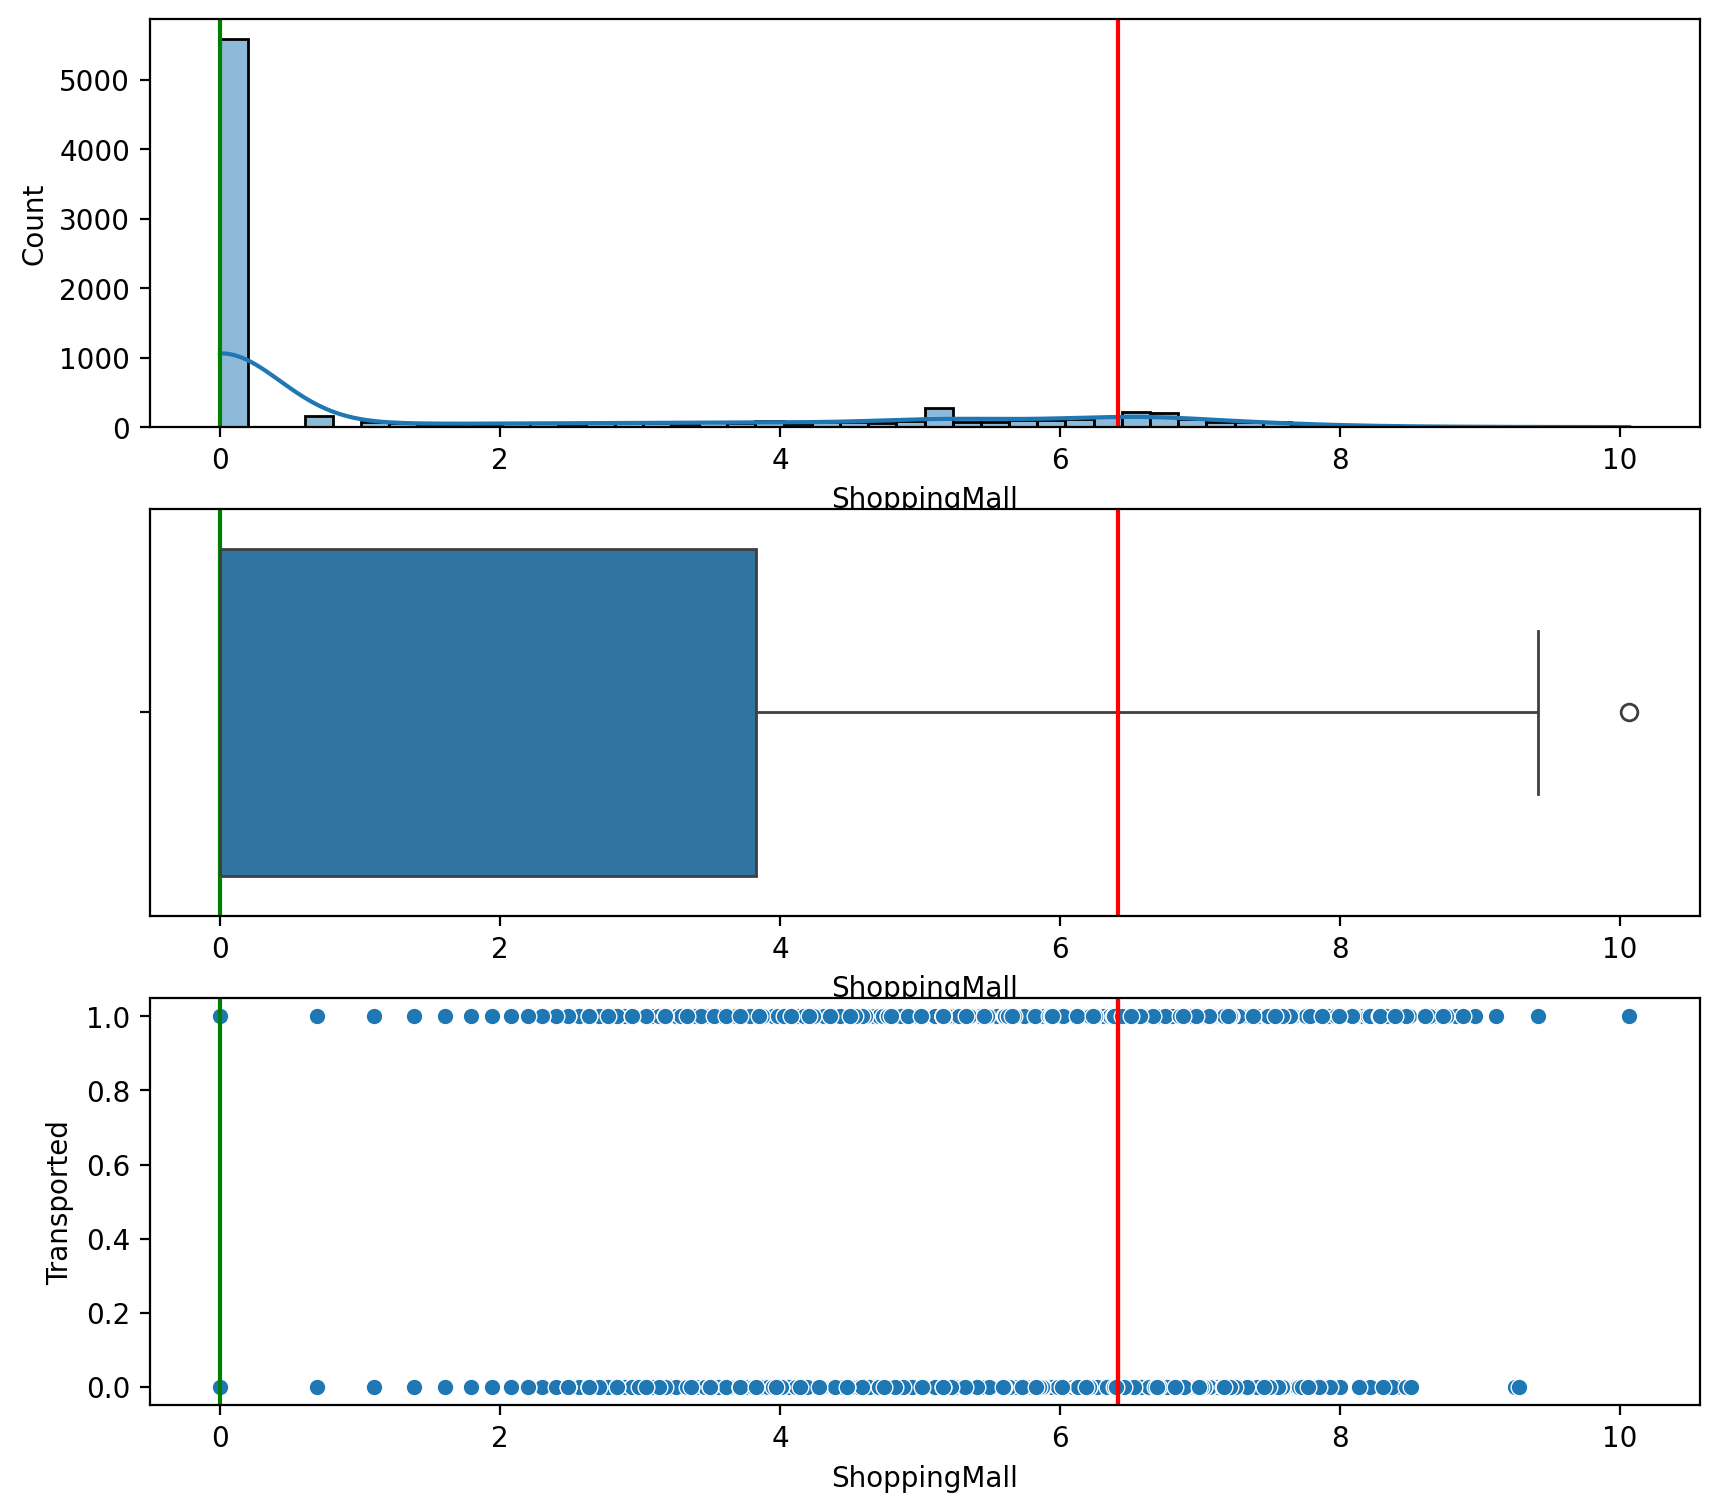

In [223]:
def Plots(lowerbound , higherbound , data , x , y):

    fig , axes = plt.subplots(3 , 1 , figsize = (10,9) , dpi = 200)

    Q1 = x.quantile(lowerbound)
    Q3 = x.quantile(higherbound)
    IQR = Q1 - Q3
    print(f"IQR : {IQR}")
    print(f"Corr : {x.corr(y)}")

    sns.histplot(x, bins = 50 , kde = True ,  ax= axes[0])
    axes[0].axvline(x.quantile(lowerbound) , color = "green")
    axes[0].axvline(x.quantile(higherbound) , color = "red")

    sns.boxplot(data = data , x = x  , ax= axes[1])
    axes[1].axvline(x.quantile(lowerbound) , color = "green")
    axes[1].axvline(x.quantile(higherbound) , color = "red")

    sns.scatterplot(data = data , x = x , y = y , ax= axes[2])
    axes[2].axvline(x.quantile(lowerbound) , color = "green")
    axes[2].axvline(x.quantile(higherbound) , color = "red")
    axes[2].axvline(x.quantile(higherbound) , color = "red")

    plt.show()

Plots(lowerbound = 0.1 , higherbound = 0.9 , data = df , x=df["ShoppingMall"] , y=df["Transported"])


In [224]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.000000,149.0,2.0,3.688879,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,2184.0,2.0,3.218876,0.0,4.700480,2.302585,3.258096,6.309918,3.806663,1.0
2,1.0,0.000000,1.0,2.0,4.077538,1.0,3.784190,8.182280,0.000000,8.812248,3.912023,0.0
3,1.0,0.000000,1.0,2.0,3.526361,0.0,0.000000,7.157735,5.918894,8.110727,5.267858,0.0
4,0.0,0.000000,2186.0,2.0,2.833213,0.0,5.717028,4.262680,5.023880,6.338594,1.098612,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.000000,146.0,0.0,3.737670,1.0,0.000000,8.827615,0.000000,7.404888,4.317488,0.0
8689,0.0,0.693147,5280.0,1.0,2.944439,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8690,0.0,0.000000,5285.0,2.0,3.295837,0.0,0.000000,0.000000,7.535297,0.693147,0.000000,1.0
8691,1.0,0.000000,2131.0,0.0,3.496508,0.0,0.000000,6.956545,0.000000,5.869297,8.082093,0.0


In [225]:
X = df.drop(["Transported"], axis = 1).values
print(X.shape)
X

(8693, 11)


array([[1.0000000e+00, 0.0000000e+00, 1.4900000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.1840000e+03, ..., 3.2580965e+00,
        6.3099184e+00, 3.8066626e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        8.8122482e+00, 3.9120231e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 5.2850000e+03, ..., 7.5352969e+00,
        6.9314718e-01, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 2.1310000e+03, ..., 0.0000000e+00,
        5.8692970e+00, 8.0820932e+00],
       [1.0000000e+00, 0.0000000e+00, 2.1310000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 2.5649493e+00]], shape=(8693, 11), dtype=float32)

In [226]:
y = df["Transported"].values.reshape(-1,1)
print(y.shape)
y

(8693, 1)


array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], shape=(8693, 1), dtype=float32)

In [227]:
fold = StratifiedKFold(n_splits=10 , shuffle=True)
for train , test in fold.split(X , y):
    X_train , X_test = X[train] , X[test]
    y_train , y_test = y[train] , y[test]

In [228]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [229]:
X_train = T.from_numpy(X_train).float() 
X_test = T.from_numpy(X_test).float() 
y_train = T.from_numpy(y_train).float().squeeze()
y_test = T.from_numpy(y_test).float().squeeze()

In [230]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_train))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [231]:
print(f"X_train Max : {X_train.max()}")
print(f"X_test Max : {X_test.max()}")
print("\n")
print(f"y_train Max : {y_train.max()}")
print(f"y_test Max : {y_test.max()}")

print("\n")

print(f"X_train min : {X_train.min()}")
print(f"X_test Max : {X_test.min()}")
print("\n")
print(f"y_train Max : {y_train.min()}")
print(f"y_test Max : {y_test.min()}")

X_train Max : 6559.0
X_test Max : 6550.0


y_train Max : 1.0
y_test Max : 1.0


X_train min : 0.0
X_test Max : 0.0


y_train Max : 0.0
y_test Max : 0.0


In [232]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [233]:
print(f"X_train Max : {X_train.max()}")
print(f"X_test Max : {X_test.max()}")
print("\n")
print(f"y_train Max : {y_train.max()}")
print(f"y_test Max : {y_test.max()}")

print("\n")

print(f"X_train min : {X_train.min()}")
print(f"X_test Max : {X_test.min()}")
print("\n")
print(f"y_train Max : {y_train.min()}")
print(f"y_test Max : {y_test.min()}")

X_train Max : 1.0
X_test Max : 1.0191011105138867


y_train Max : 1.0
y_test Max : 1.0


X_train min : 0.0
X_test Max : 0.0


y_train Max : 0.0
y_test Max : 0.0


In [234]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.000000,149.0,2.0,3.688879,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,2184.0,2.0,3.218876,0.0,4.700480,2.302585,3.258096,6.309918,3.806663,1.0
2,1.0,0.000000,1.0,2.0,4.077538,1.0,3.784190,8.182280,0.000000,8.812248,3.912023,0.0
3,1.0,0.000000,1.0,2.0,3.526361,0.0,0.000000,7.157735,5.918894,8.110727,5.267858,0.0
4,0.0,0.000000,2186.0,2.0,2.833213,0.0,5.717028,4.262680,5.023880,6.338594,1.098612,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.000000,146.0,0.0,3.737670,1.0,0.000000,8.827615,0.000000,7.404888,4.317488,0.0
8689,0.0,0.693147,5280.0,1.0,2.944439,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8690,0.0,0.000000,5285.0,2.0,3.295837,0.0,0.000000,0.000000,7.535297,0.693147,0.000000,1.0
8691,1.0,0.000000,2131.0,0.0,3.496508,0.0,0.000000,6.956545,0.000000,5.869297,8.082093,0.0


In [235]:
print(X_train.shape)
print(y_train.shape)

(7824, 11)
torch.Size([7824])


In [236]:
class NN(nn.Module):

    def __init__(self, InDims = X_train.shape[1] , OutDims = 1): 
        super().__init__()
        self.ll1 = nn.Linear(InDims , 64)
        self.ll2 = nn.Linear(64 , 32) 

        self.ll3 = nn.Linear(32 , 16)
        self.ll4 = nn.Linear(16 , OutDims) 

        self.drop = nn.Dropout(p = (0.25)) 
        self.activation = nn.ReLU() 

        self.Sig = nn.Sigmoid()

    def forward(self , X): 

        X = self.activation(self.ll1(X))
        X = self.activation(self.ll2(X))

        X = self.drop(X)

        X = self.activation(self.ll3(X))
        X = self.Sig(self.ll4(X)) 

        return X


In [237]:
class Training():

    def __init__(self):
        self.device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
        self.model = NN().to(self.device)
        self.loss = nn.BCEWithLogitsLoss()
        self.lr = 1e-3
        self.batchSize = 32
        self.optim = O.Adam(self.model.parameters() , lr = self.lr)
        self.epochs = 1
        
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        self.X_train = T.tensor(X_train, dtype=T.float32)
        self.X_test = T.tensor(X_test, dtype=T.float32)
        self.y_train = T.tensor(y_train, dtype=T.float32)
        self.y_test = T.tensor(y_test, dtype=T.float32)

        self.Tensordata = TensorDataset(self.X_train, self.y_train) #
        self.TensorTestdata = TensorDataset(self.X_test, self.y_test)

        self.TrainData = DataLoader(self.Tensordata,
                                    batch_size=32,
                                    num_workers=os.cpu_count(),
                                    shuffle=True)
        
        self.TestData = DataLoader(self.TensorTestdata,
                                   batch_size=32,
                                   num_workers=os.cpu_count())
        
    def TrainLoop(self):

        for i in range(self.epochs):
            avgLoss = []
            currentLoss = 0.0
            self.model.train()
            with tqdm.tqdm(iterable = self.Tensordata , mininterval = 0.1 , disable = False) as pBar:
                pBar.set_description(f"Epochs : {i + 1}")
                for X , y in pBar:
                    X , y = X.to(self.device) , y.to(self.device)
                    
                   
                    logits = self.model(X)
                    loss = self.loss(logits , y.unsqueeze(0)) 
                    self.optim.zero_grad()
                    loss.backward() 
                    self.optim.step() 

                    currentLoss += loss.item()
                    pBar.set_postfix({"loss" : loss.item() })

            avgloss = currentLoss / len(self.TrainData)
            avgLoss.append(avgloss)
            print(f"Epoch : {i + 1} / {self.epochs} | Loss : {currentLoss / len(self.TrainData):.4f}")

    def EvalLoop(self):
        currentLoss = 0.0
        self.model.eval()
        with tqdm.tqdm(iterable = self.TensorTestdata , mininterval = 0.1 , disable = False) as pBar:
            pBar.set_description("Evaluate")

            for X , y in pBar:
                X , y = X.to(self.device) , y.to(self.device)

                logits = self.model(X)
                loss = self.loss(logits , y.unsqueeze(0)) 
                                           

            currentLoss += loss.item()

        print(f"Epoch : {i + 1} / {self.epochs} | Loss : {currentLoss / len(self.TestData):.4f}")




In [238]:
exe = Training()

C:\Users\peter longnose\AppData\Local\Temp\ipykernel_9176\2236699916.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_train = T.tensor(y_train, dtype=T.float32)
C:\Users\peter longnose\AppData\Local\Temp\ipykernel_9176\2236699916.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_test = T.tensor(y_test, dtype=T.float32)


In [239]:
exe.TrainLoop()

Epochs : 1: 100%|██████████| 7824/7824 [00:16<00:00, 475.04it/s, loss=0.69] 

Epoch : 1 / 1 | Loss : 19.7726


In [240]:
exe.EvalLoop()

Evaluate: 100%|██████████| 869/869 [00:00<00:00, 4857.35it/s]


TypeError: can only concatenate str (not "int") to str